이 보고서는 机器学习与知识发现,模式识别导论 수업에서 쓴 ppt, 인터넷을 참고 했습니다.<br>
<img src="../photo/HW1_require.png" width="1000" height="700"/><br>

일단 문제를 간단히 분석해보자면 polynomial regression을 ridge regression을 써서 분석하는 문제라 할 수 있습니다.<br>
이전에 다중 선형회귀를 구현한 적이 있었는데 비슷한 개념으로 접근했다가 시간을 많이 낭비했었습니다.<br>
다중 선형회귀랑 일반적인 선형회귀의 차이점은 출력값인 y가 여러 입력 값에 영향을 받는 것인데<br>
다항 선형회귀는 하나의 독립변수만 사용하여 예측을 수행하는데 해당 독립변수와 종속 변수 사이에 n차 다항식 관계를 가정하는 것이 특징입니다.<br>


즉 단순 선형회귀에서 가설(예측)함수가 다음과 같다면
$ {\mathbf f(x) = w(0) + w(1)*x(1)} $<br>
x(1) 이 유일한 변수

다중 선형회귀에서의 가설(예측)함수는 다음과 같고<br>
$ 𝑓(x)  = 𝑤(0) + 𝑤(1) 𝑥(1) + ⋯ + 𝑤(𝑛)𝑥(𝑛) = 𝑤^𝑇x$<br>
x_1, x_2...x_n 이 여러개의 변수<br>

다항 선형회귀에선 다음과 같다는 말입니다.<br>
$ f(x)=w_{n}x^n+w_{n-1}x^{n-1}+...+w_2x^2+w_1x+b$<br>
$x..x^k$ 가 다항변수인데 입력은 x 하나만 갖음<br>

여기서 입력 변수의 개수를 feature 라고 합니다.<br>

삽질한거 생각하니까 눈물이 나네요<br>
일단 시작해봅시다.<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(3)

문제에 조건식을 보면
$y=w^Tx+{\epsilon}$ 이라고 적혀있죠<br>
예측되는 데이터는 입력의 결정론적 함수와 랜덤 노이즈의 합이라는 말입니다.<br>

In [25]:

def func(x, c): 
    return sum([c[i] * x**i for i in range(len(c))])

num_data_points = 300
degree = 3

X = np.random.uniform(-10, 10, num_data_points)
c = [np.random.uniform(-3, 3) for _ in range(degree + 1)]
y = np.array( [func(X[i], c) for i in range(num_data_points)] )

mu, sigma = 0, 50
noise = np.random.normal(mu, sigma, num_data_points)

y = np.add(y, noise)

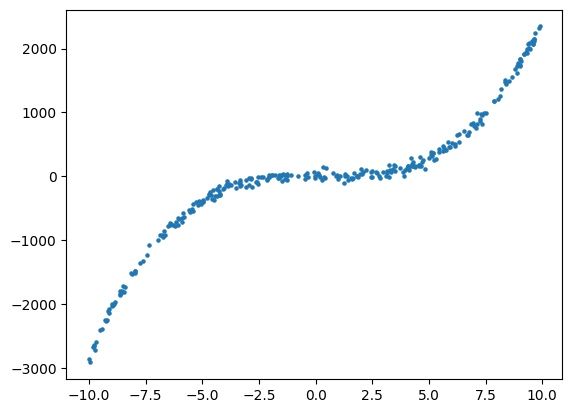

In [26]:
plt.scatter(X, y, s = 5)


In [4]:
x_tr, y_tr = np.array(X[:len(X)*3//4]), np.array(y[:len(y)*3//4])
x_val, y_val = np.array(X[len(X)*3//4:]), np.array(y[len(y)*3//4:])

print('Training set length: {}\nValidation set length: {}'.format(len(x_tr), len(x_val)))

Training set length: 225
Validation set length: 75


In [27]:
W = [np.random.random() for _ in range(degree + 1)] #+1 is for W_0

In [28]:
def update_weights(degree, x, y):
    A = np.linalg.inv(np.array( 
        [ [sum(np.power(x, i)) for i in range(j, degree + 1 + j)] for j in range(degree + 1) ]
    ))

    return np.dot(A, np.array( [ sum(y * np.power(x, i)) for i in range(degree+1) ] ))

def predict(W, x):
    return sum([W[i] * x**i for i in range(len(W))])
    
W = update_weights(3, x_tr, y_tr)
g = predict(W, x_tr)

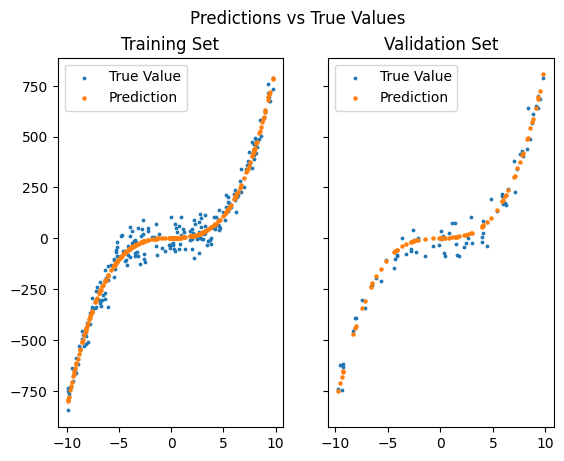

In [29]:
def plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val):
    fig, axs = plt.subplots(1, 2, sharey = True)
    fig.suptitle('Predictions vs True Values')

    axs[0].scatter(x_tr, y_tr, s = 3, label = 'True Value')
    axs[0].scatter(x_tr, g, s = 5, label = 'Prediction')
    axs[0].legend()
    axs[0].set_title('Training Set')

    axs[1].scatter(x_val, y_val, s = 3, label = 'True Value')
    axs[1].scatter(x_val, g_val, s = 5, label = 'Prediction')
    axs[1].legend()
    axs[1].set_title('Validation Set')
    
    plt.show()
    
g_val = sum([W[i] * x_val**i for i in range(len(W))])

plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val)

In [8]:
def RSE(y, g): 
    return sum(np.square(y - g)) / sum(np.square(y - 1 / len(y)*sum(y)))

error = RSE(y_val, g_val)
print('RSE: {}'.format(error))

R_squared = 1 - error
print('R_squared: {:.4f}'.format(R_squared))

RSE: 0.02378143424890147
R_squared: 0.9762


In [9]:

A = np.linalg.inv(np.array( 
    [ [sum(np.power(x_tr, i)) for i in range(j, degree + j)] for j in range(degree) ]
))

W = np.dot(A, np.array( [ sum(y_tr * np.power(x_tr, i)) for i in range(degree) ] ))

#Predictions
g = sum([W[i] * x_tr**i for i in range(len(W))])

In [30]:
degree = 6

A = np.linalg.inv(np.array( 
    [ [sum(np.power(x_tr, i)) for i in range(j, degree + j)] for j in range(degree) ]
))

W = np.dot(A, np.array( [ sum(y_tr * np.power(x_tr, i)) for i in range(degree) ] ))

#Predictions
g = sum([W[i] * x_tr**i for i in range(len(W))])

c:\Users\joong\anaconda3\envs\ml\lib\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


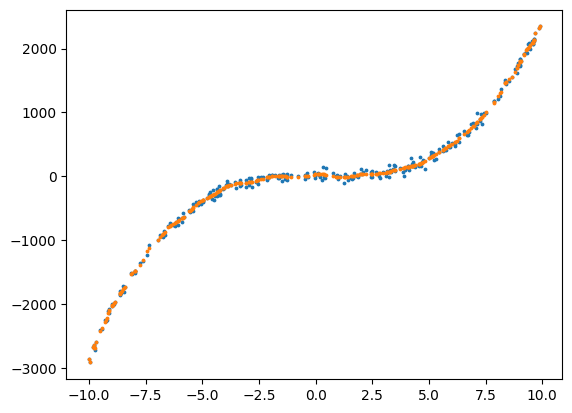

In [36]:
np_model = np.poly1d(np.polyfit(X, y, 290))

plt.scatter(X, y, s = 3, label = 'Data')
plt.scatter(X, np_model(X), s = 3, label = 'Numpy Predictions')